In [1]:
import os
from pylab import *
import matplotlib.pyplot as plt
from IPython.core.display import display,HTML
import math
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

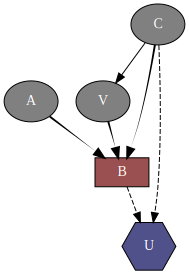

In [2]:
"""
Créer un ID avec des strings
*D = noeud décision
$U = noeud d'utilité
C  = noeud chance
"""
ID1=gum.fastID("A->*B<-C->V->B->$U<-C")
gnb.showInfluenceDiagram(ID1)

In [3]:
"Créer un ID avec des fonctions (sans doute comment on va proceder)"
ID2=gum.fastID("")


#Façon de créer des noeuds LabelizedVariable(aName, aDesc=’’, nbrLabel=2) -> LabelizedVariable
chanceNode=ID2.addChanceNode(gum.LabelizedVariable("nameChance","DescriptionOptionelleChance",3))
UtilityNode=ID2.addUtilityNode(gum.LabelizedVariable("nameUtility","DescriptionOptionelleUtility",1))
DecisionNode=ID2.addDecisionNode(gum.LabelizedVariable("nameDecision","DescriptionOptionelleDecision",2))

#Façon d'ajouter un arc
ID2.addArc(chanceNode,DecisionNode)
ID2.addArc(DecisionNode,ID2.idFromName("nameUtility"))



ID2.cpt(chanceNode)[{'s':0}]=[0.7,0.2,0.1]
ID2.cpt(chanceNode)[{'s':1}]=[0.1,0.8,0.1]

ID2.utility(UtilityNode)[{'nameDecision':0}]=10
ID2.utility(UtilityNode)[{'nameDecision':1}]=5
gnb.sideBySide(ID2,gnb.getInference(ID2))


ID2.variable(ID2.idFromName("nameDecision")).domain()

"G <!-- nameChance --> nameChance nameChance <!-- nameDecision --> nameDecision nameDecision <!-- nameChance->nameDecision --> nameChance->nameDecision <polygon fill=""black"" stroke=""transparent"" stroke-width=""2"" stroke-dasharray=""1,5"" points=""66.32,-148.27 66.27,-147.07 66.22,-145.84 66.18,-144.6 66.13,-143.35 66.08,-142.08 66.03,-140.8 65.98,-139.51 65.93,-138.21 65.88,-136.91 65.83,-135.6 65.77,-134.29 65.72,-132.97 65.67,-131.66 65.62,-130.35 65.57,-129.05 65.52,-127.75 65.47,-126.45 65.42,-125.17 65.37,-123.9 65.32,-122.63 65.32,-122.63 65.27,-123.9 65.22,-125.17 65.17,-126.45 65.12,-127.75 65.07,-129.05 65.02,-130.35 64.97,-131.66 64.92,-132.97 64.87,-134.29 64.81,-135.6 64.76,-136.91 64.71,-138.21 64.66,-139.51 64.61,-140.8 64.56,-142.08 64.51,-143.35 64.46,-144.6 64.41,-145.84 64.37,-147.07 64.32,-148.27 66.32,-148.27""/> <!-- nameUtility --> nameUtility nameUtility <!-- nameDecision->nameUtility --> nameDecision->nameUtility"


'<0,1>'

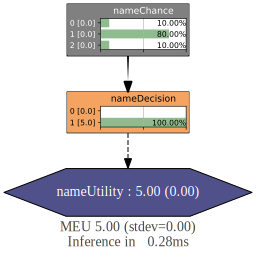

In [4]:
#Forcer une décision
gnb.showInference(ID2,evs={'nameDecision':'1'})

In [88]:
import numpy as np
def createIDRobot(n,xInitial,yInitial):
    
    #gris est l'ensemble des coordonnées des cases grises
    cases,gris=getCasesAndGris()

    ID=gum.fastID("")
    chances=np.zeros((n,6))
    decision=np.zeros(n)
    """
    chances contient tous les identifiants des noeuds chance de l'ID, par convention, si l'ID est égal à
    0 mod(6) --> le noeud est un x
    1 mod(6) --> le noeud est un y
    2 mod(6) --> le noeud est un n
    3 mod(6) --> le noeud est un e
    4 mod(6) --> le noeud est un s
    5 mod(6) --> le noeud est un w

    decision contient tous les identifiants des noeuds décisions de l'ID, par convention, si l'ID est égal à 
    6*n+i pour tout i appartenant à 0,...,n-1, le noeud est le noeud décision de la ième étape.
    """
    for i in range(n):
        #Création des noeuds chance
        temp=chances[i]
        #ajouter x

        temp[0]=int(ID.addChanceNode(gum.LabelizedVariable("x_"+str(i),str(i),9),6*i))
        #ajouter y
        temp[1]=int(ID.addChanceNode(gum.LabelizedVariable("y_"+str(i),str(i+1),7),6*i+1))
        """for k in range(4):
            temp[k+2]=ID.addChanceNode(gum.LabelizedVariable(str(6*i+2+k),str(6*i+2+k),2),6*i+2+k)"""
        temp[2]=ID.addChanceNode(gum.LabelizedVariable("ns_"+str(i),str(6*i+2),2),6*i+2)
        temp[3]=ID.addChanceNode(gum.LabelizedVariable("es_"+str(i),str(6*i+2+1),2),6*i+2+1)
        temp[4]=ID.addChanceNode(gum.LabelizedVariable("ss_"+str(i),str(6*i+2+3),2),6*i+2+2)
        temp[5]=ID.addChanceNode(gum.LabelizedVariable("ws_"+str(i),str(6*i+2+3),2),6*i+2+3)
        #Création du noeud de décision
        decision[i]=int(ID.addDecisionNode(gum.LabelizedVariable("d_"+str(i),str(i+50000),5),i+50000))
        
        
        #Creation des arcs entre x,y et les capteurs de l'étape courante
        x=int(temp[0])
        y=int(temp[1])
        ns=int(temp[2])
        es=int(temp[3])
        ss=int(temp[4])
        ws=int(temp[5])
        
        print(x,y,ns,es,ss,ws)
        ID.addArc(x,y)
        ID.addArc(x,ns)
        ID.addArc(x,es)
        ID.addArc(x,ss)
        ID.addArc(x,ws)
        ID.addArc(y,ns)
        ID.addArc(y,es)
        ID.addArc(y,ss)
        ID.addArc(y,ws)

        #Création des arcs depuis TOUS les noeuds chances des capteurs vers le noeud de décision courant
        #de l'étape
        for l in range(i+1):
            ID.addArc(int(chances[(l)][2]),int(decision[i]))
            ID.addArc(int(chances[(l)][3]),int(decision[i]))
            ID.addArc(int(chances[(l)][4]),int(decision[i]))
            ID.addArc(int(chances[(l)][5]),int(decision[i]))
        #Création des arcs depuis x_i-1 vers x_i et de y_i-1 vers y_i (seulement à partir de la deuxième étape)
        if(i>0):
            ID.addArc(int(tempavant[0]),int(y))
            ID.addArc(int(tempavant[0]),int(x))
            ID.addArc(int(tempavant[1]),int(y))
            ID.addArc(int(tempavant[1]),int(x))

            #Création des arcs entre le noeud de décision de la i-1 ème étape vers x_i et y_i
            ID.addArc(int(decision[i-1]),x)
            ID.addArc(int(decision[i-1]),y)

        tempavant=temp
        
        #TODO : Fonction d'utilité, Politiques, Potentiels pour noeuds chance x_i y_i avec i≠0
        
            
        #potentiels des noeuds chance capteur
        for h in range(9):
            for j in range(7):
                ID.cpt(ns)[{"x_"+str(i):h,"y_"+str(i):j}]=[0,1]
                ID.cpt(es)[{"x_"+str(i):h,"y_"+str(i):j}]=[0,1]
                ID.cpt(ss)[{"x_"+str(i):h,"y_"+str(i):j}]=[0,1]
                ID.cpt(ws)[{"x_"+str(i):h,"y_"+str(i):j}]=[0,1]
        for g in range(2,6):
            ID.cpt(ns)[{"x_"+str(i):2,"y_"+str(i):g}]=[1,0]
            ID.cpt(ns)[{"x_"+str(i):4,"y_"+str(i):g}]=[1,0]
            ID.cpt(ns)[{"x_"+str(i):6,"y_"+str(i):g}]=[1,0]
          
            ID.cpt(es)[{"x_"+str(i):g,"y_"+str(i):1}]=[1,0]
            ID.cpt(es)[{"x_"+str(i):g,"y_"+str(i):5}]=[1,0]
      
        ID.cpt(es)[{"x_"+str(i):1,"y_"+str(i):2}]=[1,0]
        ID.cpt(es)[{"x_"+str(i):1,"y_"+str(i):4}]=[1,0]
        ID.cpt(es)[{"x_"+str(i):6,"y_"+str(i):2}]=[1,0]
        ID.cpt(es)[{"x_"+str(i):6,"y_"+str(i):4}]=[1,0]
        for g in range(1,5):
            ID.cpt(ss)[{"x_"+str(i):2,"y_"+str(i):g}]=[1,0]
            ID.cpt(ss)[{"x_"+str(i):4,"y_"+str(i):g}]=[1,0]
            ID.cpt(ss)[{"x_"+str(i):6,"y_"+str(i):g}]=[1,0]
        for g in range(3,7):
            ID.cpt(ws)[{"x_"+str(i):g,"y_"+str(i):2}]=[1,0]
            ID.cpt(ws)[{"x_"+str(i):g,"y_"+str(i):5}]=[1,0]
        ID.cpt(ws)[{"x_"+str(i):2,"y_"+str(i):2}]=[1,0]
        ID.cpt(ws)[{"x_"+str(i):2,"y_"+str(i):4}]=[1,0]
        ID.cpt(ws)[{"x_"+str(i):7,"y_"+str(i):2}]=[1,0]
        ID.cpt(ws)[{"x_"+str(i):7,"y_"+str(i):4}]=[1,0]
    
    #potentiels des noeuds positions x y avec i==0
        if(i==0):
            
            ID.cpt(x)[xInitial]=1
            ID.cpt(y)[yInitial]=1
        #potentiels des noeuds positions x y avec i>0

        else:

            bonneCase=0.89 #de bouger (à l'ouest)
            pasBouger=0.089 #de pas bouger
            estOuest=0.01 #de chance de bouger à l'ouest/est
            sud=0.001 #de chance d'aller au sud

            gauche=0
            haut=1
            droite=2
            bas=3
            mur=1
            pasMur=0

            #0 ouest
            #1 nord
            #2 est
            #3 sud
            #4 rester sur place

            for l in gris:
                xl=l[0]
                yl=l[1]
                for dtemp in range(5):
                    ID.cpt(x)[{"x_"+str(i-1):xl,"y_"+str(i-1):yl,"d_"+str(i-1):dtemp}]=[0,0,0,0,0,0,0,0,0]
                    ID.cpt(y)[{"x_"+str(i-1):xl,"y_"+str(i-1):yl,"d_"+str(i-1):dtemp}]=[[0,0,0,0,0,0,0] for i in range(9)]
            #print(ID.cpt(x))

            for xtemp in range(9):
                for ytemp in range(7):
                    if (not [xtemp,ytemp] in gris):
                        #d==0 (ouest)
                        if(cases[xtemp,ytemp,gauche]==mur and cases[xtemp,ytemp,droite]==pasMur and cases[xtemp,ytemp,bas]==pasMur):
                            ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}][xtemp]=0.089+0.001
                            ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}][xtemp+1]=0.01
                            normalize(ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}])
                            
                            #x=xtemp+1
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp+1}][ytemp]=1
                            #x=xtemp
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}][ytemp]=1-0.001
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}][ytemp]=0.001
                            normalize(ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}])
            
                        if(cases[xtemp,ytemp,gauche]==mur and cases[xtemp,ytemp,droite]==mur and cases[xtemp,ytemp,bas]==pasMur):
                            ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}][xtemp]=1
                            #x=xtemp
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}][ytemp]=1-0.001
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}][ytemp+1]=0.001
                            normalize(ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}])
                            normalize(ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}])
                        if(cases[xtemp,ytemp,gauche]==mur and cases[xtemp,ytemp,droite]==pasMur and cases[xtemp,ytemp,bas]==mur):
                            ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}][xtemp]=0.089
                            ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}][xtemp+1]=0.01
                            normalize(ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}])
                            #x=xtemp+1
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp+1}][ytemp]=1
                            #x=xtemp
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}][ytemp]=1
                        #if(cases[xtemp,ytemp,gauche]==mur and cases[xtemp,ytemp,droite]==mur and cases[xtemp,ytemp,bas]==mur):
                            #Cas qui n'existe pas
                        if(cases[xtemp,ytemp,gauche]==pasMur and cases[xtemp,ytemp,droite]==mur and cases[xtemp,ytemp,bas]==pasMur):
                            ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}][xtemp-1]=0.89+0.01
                            ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}][xtemp]=0.089+0.001
                            normalize(ID.cpt(x)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche}])
                            #x=xtemp+1
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp+1}][ytemp]=1
                            #x=xtemp
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}][ytemp]=1-0.001
                            ID.cpt(y)[{"x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):gauche,"x_"+str(i):xtemp}][ytemp+1]=0.001
                        #if(cases[xtemp,ytemp,gauche]==pasMur and cases[xtemp,ytemp,droite]==mur and cases[xtemp,ytemp,bas]==mur):
                        #if(cases[xtemp,ytemp,gauche]==pasMur and cases[xtemp,ytemp,droite]==pasMur and cases[xtemp,ytemp,bas]==pasMur):
                        #if(cases[xtemp,ytemp,gauche]==pasMur and cases[xtemp,ytemp,droite]==pasMur and cases[xtemp,ytemp,bas]==mur):
    
    ID.addArc(int(decision[n-1]),ID.addChanceNode(gum.LabelizedVariable("x_"+str(n),"xfinal",9)))
    ID.addArc(int(decision[n-1]),ID.addChanceNode(gum.LabelizedVariable("y_"+str(n),"yfinal",7)))
    ID.addArc(int(ID.idFromName("x_"+str(n))),int(ID.idFromName("y_"+str(n))))
    ID.addUtilityNode(gum.LabelizedVariable("u","u",1))
    ID.addArc(int(ID.idFromName("x_"+str(n))),int(ID.idFromName("u")))
    ID.addArc(int(ID.idFromName("y_"+str(n))),int(ID.idFromName("u")))
    return ID

#gnb.showInfluenceDiagram(createIDRobot(2,3,2))
#gnb.showInference(createIDRobot(2,3,2))
ID=createIDRobot(2,3,2)
gnb.sideBySide(ID,gnb.getInference(ID))

0 1 2 3 4 5
6 7 8 9 10 11


<ipython-input-72-9e04d8c50f06>:76: RuntimeWarning: invalid value encountered in true_divide
  return array/sum(array)


In [5]:
sum([0,0.89+0.01,0.089+0.001,0,0,0,0,0]/sum([0,0.89+0.01,0.089+0.001,0,0,0,0,0]))

1.0

In [32]:
def getCasesAndGris():
    cases=np.zeros((9,7,4))
    gris=[]
    for h in range(9):
        gris.append([h,0])
        gris.append([h,6])
    for h in range(7):
        gris.append([0,h])
        gris.append([8,h])
    gris.append([1,1])
    gris.append([1,3])
    gris.append([1,5])
    gris.append([3,2])
    gris.append([3,3])
    gris.append([3,4])
    gris.append([5,2])
    gris.append([5,3])
    gris.append([5,4])
    gris.append([7,1])
    gris.append([7,3])
    gris.append([7,5])

    for g in gris:
        x,y=g
        for i in range(4):
            cases[x,y,i]=1
    #traits hozizontaux
    for x in range(2,7):
        cases[x,1][1]=1
        cases[x,5][3]=1

    cases[2,1][0]=1
    cases[2,5][0]=1
    cases[6,1][2]=1
    cases[6,5][2]=1
    cases[3,1,3]=1
    cases[5,1,3]=1
    cases[3,5,1]=1
    cases[5,5,1]=1

    #traits verticaux
    for y in range(2,5):
        cases[4,y][0]=1
        cases[4,y][2]=1

        cases[2,y][2]=1
        cases[6,y][0]=1

    cases[6,3][2]=1
    cases[2,3][0]=1

    #autres
    cases[1,2,0]=1
    cases[1,2,1]=1
    cases[1,2,3]=1

    cases[1,4,0]=1
    cases[1,4,1]=1
    cases[1,4,3]=1

    cases[7,2,2]=1
    cases[7,2,1]=1
    cases[7,2,3]=1

    cases[7,4,2]=1
    cases[7,4,1]=1
    cases[7,4,3]=1

    
    return cases.T,gris
cases,gris=getCasesAndGris()
for i in range(4):
        print(cases[:,:,[i]].T,"\n")
        
def normalize(array):
    array=array/sum(array)

[[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 0. 0. 0. 0. 1. 1.]
  [1. 1. 0. 1. 1. 1. 1. 0. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 1. 1. 1. 1. 0. 1.]
  [1. 1. 1. 0. 0. 0. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 

[[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 

[[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 0. 0. 0. 1. 1. 1.]
  [1. 0. 1. 1. 1. 1. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 1. 1. 1. 0. 1. 1.]
  [1. 1. 0. 0. 0. 0. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 

[[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 



In [7]:
 """for xtemp in range(9):
                for ytemp in range(7):

                    if (not [xtemp,ytemp] in gris):
                        #d==0 (ouest)
                        if(xtemp==1):
                            ID.cpt(x)["x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):0]=[0,bonneCase+pasBouger,estOuest,0,0,0,0,0,0]/sum([0,bonneCase+pasBouger,estOuest,0,0,0,0,0,0])
                            ID.cpt(y)["x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):0][ytemp]=1
                        if(xtemp==2):
                            if(ytemp in [1,3,5]):
                                if(ytemp==3):
                                    ID.cpt(x)["x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):0]=[0,0,1,0,0,0,0,0,0]
                                    ID.cpt(y)["x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):0][ytemp]=1
                                ID.cpt(x)["x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):0]=[0,0,1,0,0,0,0,0,0]
                                ID.cpt(y)["x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):0][ytemp]=1
                            else:
                                ID.cpt(x)["x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):0]=[0,0.89,0.089,0,0,0,0,0]
                                ID.cpt(y)["x_"+str(i-1):xtemp,"y_"+str(i-1):ytemp,"d_"+str(i-1):0][ytemp]=1

        ID.cpt(x)["x_"+str(i-1):2,"y_"+str(i-1):4,"d_"+str(i-1):0]=[0,0.89+0.01,0.089+0.001,0,0,0,0,0]/sum([0,0.89+0.01,0.089+0.001,0,0,0,0,0])
        ID.cpt(y)["x_"+str(i-1):2,"y_"+str(i-1):4,"d_"+str(i-1):0][ytemp]=1"""

0 1
